In [2]:
from collections import Counter
import pandas as pd
from sklearn.model_selection import (train_test_split)
from sklearn.metrics import (
    mean_squared_error as MSE,
    classification_report,
    confusion_matrix,
    roc_auc_score,
    f1_score,
    accuracy_score,
    precision_score,
    recall_score,
    average_precision_score,
    log_loss
)

import numpy as np
import optuna
from sklearn.preprocessing import OrdinalEncoder
import matplotlib.pyplot as plt
import xgboost as xgb
from imblearn.over_sampling import SMOTE


data = pd.read_csv("data/employee_data.csv")
oversample = SMOTE()
encoder = OrdinalEncoder()

# exploratory data analysis


In [3]:
data.head(2)

,Age,Staying?,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7


In [4]:
list(data.columns)

['Age',
 'Staying?',
 'BusinessTravel',
 'DailyRate',
 'Department',
 'DistanceFromHome',
 'Education',
 'EducationField',
 'EmployeeCount',
 'EmployeeNumber',
 'EnvironmentSatisfaction',
 'Gender',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobRole',
 'JobSatisfaction',
 'MaritalStatus',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'Over18',
 'OverTime',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StandardHours',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Staying?                  1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [6]:
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [7]:
data.describe(exclude="number")

,Staying?,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1470,1470,1470,1470,1470,1470,1470,1470,1470
unique,2,3,3,6,2,9,3,1,2
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,1233,1043,961,606,882,326,673,1470,1054


# feature engineering


In [8]:
data = data.drop(["EmployeeCount", "EmployeeNumber", "Over18", "StandardHours"], axis=1)
data["first_company"] = np.where(data.NumCompaniesWorked == 0, 1, 0)
data["first_role"] = np.where(data.YearsAtCompany == data.YearsInCurrentRole, 1, 0)
data["first_manager"] = np.where(data.YearsWithCurrManager == data.YearsAtCompany, 1, 0)

In [9]:
X = data.drop(columns=["Staying?"])
y = data["Staying?"]

# turns categorical columns into numerical columns
X = pd.DataFrame(encoder.fit_transform(X), columns=encoder.get_feature_names_out())

categorical_cols = X.select_dtypes(include="object").columns.tolist()
categorical_cols.append("Education")
categorical_cols.append("EnvironmentSatisfaction")
categorical_cols.append("JobInvolvement")
categorical_cols.append("JobLevel")
categorical_cols.append("JobSatisfaction")
categorical_cols.append("PerformanceRating")
categorical_cols.append("RelationshipSatisfaction")
categorical_cols.append("WorkLifeBalance")
categorical_cols.append("StockOptionLevel")

# same as factors in R
for col in categorical_cols:
    X[col] = X[col].astype("category")

y.replace("Yes", 1, inplace=True)
y.replace("No", 0, inplace=True)
y.astype(int)


# use stratify due to imbalanced data with classification
X_train, X_leftover, y_train, y_leftover = train_test_split(X, y, test_size=0.3, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_leftover, y_leftover, test_size=0.5, stratify=y_leftover)

# to handle imbalance
# X_train, y_train = oversample.fit_resample(X_train, y_train)


d_train = xgb.DMatrix(X_train, label=y_train, enable_categorical=True)
d_val = xgb.DMatrix(X_val, label=y_val, enable_categorical=True)
d_test = xgb.DMatrix(X_test, label=y_test, enable_categorical=True)

In [10]:
print("negative proportion:", Counter(y)[0] / len(y))
print("positive proportion:", Counter(y)[1] / len(y))
print(Counter(y))

negative proportion: 0.8387755102040816
positive proportion: 0.16122448979591836
Counter({0: 1233, 1: 237})


In [11]:
Counter(y_train)

Counter({0: 863, 1: 166})

In [12]:
Counter(y)[0] / Counter(y)[1]

5.2025316455696204

bagging reduces variance

boosting decreases bias

alpha: l2. bigger = underfit. when you have a lot of features

lambda: l1. bigger = underfit

## overfitting

1st. model complexity

- max_depth
- min_child_weight
- gamma (min_split_loss)

2nd. randomness, to make training robust to noise

- subsample
- colsample_bytree

## imbalance

overall performance

- scale_pos_weight
- use auc for evaluation

correct probability

- when you can't rebalance
- max_delta_step to finite number

## eval metrics

(auc) roc auc

- not when heavily imbalanced

(aucpr) pr auc

- when heavily imbalanced
- positive class

(map) mean average precision

- a

(f score) harmonic mean of precision and recall

- when you care more about positive


In [13]:
storage = optuna.storages.RDBStorage(
    url="sqlite:///employee_data.db",
)

In [72]:
# optuna.study.delete_study("employee_data_f1", storage=storage)

C:\Users\Nicholas\AppData\Local\Temp\ipykernel_24904\3778246079.py:1: FutureWarning:

delete_study(): Please give all values as keyword arguments. See https://github.com/optuna/optuna/issues/3324 for details.



In [190]:
optuna.logging.set_verbosity(optuna.logging.INFO)

study = optuna.create_study(
    storage=storage,
    direction="minimize",
    study_name="employee_data_logloss",
    load_if_exists=True,
    pruner=optuna.pruners.HyperbandPruner(),
    sampler=optuna.samplers.TPESampler(
        consider_prior=True,
        consider_magic_clip=True,
        multivariate=True,
        constant_liar=True,
        warn_independent_sampling=False,
    ),
)

# study = optuna.create_study(
#     # storage=storage,
#     direction="maximize",
#     study_name="employee_data_f1",
#     load_if_exists=True,
#     pruner=optuna.pruners.HyperbandPruner(),
#     sampler=optuna.samplers.TPESampler(),
# )

recall_study = optuna.create_study(
    storage=storage,
    direction="maximize",
    study_name="employee_data_recall",
    load_if_exists=True,
    pruner=optuna.pruners.HyperbandPruner(),
    sampler=optuna.samplers.TPESampler(),
    # pruner=optuna.samplers.RandomSampler(),
    # sampler=optuna.pruners.MedianPruner(),
)

f1_study = optuna.create_study(
    storage=storage,
    direction="maximize",
    study_name="employee_data_f1",
    load_if_exists=True,
    pruner=optuna.pruners.HyperbandPruner(),
    sampler=optuna.samplers.TPESampler(),
    # pruner=optuna.samplers.RandomSampler(),
    # sampler=optuna.pruners.MedianPruner(),
)

auc_study = optuna.create_study(
    storage=storage,
    direction="maximize",
    study_name="employee_data_auc",
    load_if_exists=True,
    pruner=optuna.pruners.HyperbandPruner(),
    sampler=optuna.samplers.TPESampler(),
    # pruner=optuna.samplers.RandomSampler(),
    # sampler=optuna.pruners.MedianPruner(),
)


logloss_study = optuna.create_study(
    storage=storage,
    direction="minimize",
    study_name="employee_data_logloss",
    load_if_exists=True,
    pruner=optuna.pruners.HyperbandPruner(),
    sampler=optuna.samplers.TPESampler(),
)

c:\Users\Nicholas\AppData\Local\pypoetry\Cache\virtualenvs\python-3_T6Md9L-py3.11\Lib\site-packages\optuna\samplers\_tpe\sampler.py:282: ExperimentalWarning:

``multivariate`` option is an experimental feature. The interface can change in the future.

c:\Users\Nicholas\AppData\Local\pypoetry\Cache\virtualenvs\python-3_T6Md9L-py3.11\Lib\site-packages\optuna\samplers\_tpe\sampler.py:301: ExperimentalWarning:

``constant_liar`` option is an experimental feature. The interface can change in the future.

[I 2023-06-04 22:10:54,470] Using an existing study with name 'employee_data_logloss' instead of creating a new one.
[I 2023-06-04 22:10:54,474] Using an existing study with name 'employee_data_recall' instead of creating a new one.
[I 2023-06-04 22:10:54,483] Using an existing study with name 'employee_data_f1' instead of creating a new one.
[I 2023-06-04 22:10:54,493] Using an existing study with name 'employee_data_auc' instead of creating a new one.
[I 2023-06-04 22:10:54,501] Using an 

In [192]:
def objective(trial):
    test_metric = "logloss"
    
    param = {
        # "verbosity": 0,
        "objective": "binary:logistic",
        "tree_method": "hist",
        "eval_metric": f"{test_metric}",
        "scale_pos_weight": trial.suggest_float("scale_pos_weight", 0, 10),
        # "scale_pos_weight": Counter(y)[0] / Counter(y)[1],
        # "max_delta_step": trial.suggest_int("max_delta_step", 0, 10),
        "booster": trial.suggest_categorical("booster", ["gbtree","dart"]),
        "lambda": trial.suggest_float("lambda", 1e-8, 40.0, log=True),
        "alpha": trial.suggest_float("alpha", 1e-8, 20.0, log=True),
        "subsample": trial.suggest_float("subsample", 0.5, 1.0, log=True),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.1, 1.0),
        "colsample_bylevel": trial.suggest_float("colsample_bylevel", 0.1, 1.0, log=True), 
        "colsample_bynode": trial.suggest_float("colsample_bynode", 0.1, 1.0, log=True), 
        "sampling_method": "uniform",  # uniform, gradient_based
        "min_child_weight": trial.suggest_float("min_child_weight", 1, 200),
        "max_bin": trial.suggest_int("max_bin", 10, 2000),
        "num_parallel_tree": trial.suggest_int("num_parallel_tree", 1, 500),
        "max_depth": trial.suggest_int("max_depth", 1, 10),
        "learning_rate": trial.suggest_float("learning_rate", 1e-8, 1.0),
        "gamma": trial.suggest_float("gamma", 1e-8, 20.0, log=True),
        "grow_policy": trial.suggest_categorical("grow_policy", ["depthwise","lossguide"]),
    }

    if param["grow_policy"] == "lossguide":
        param["max_leaves"] = trial.suggest_int("max_leaves", 1, 20)

    if param["booster"] == "dart":
        param["sample_type"] = trial.suggest_categorical("sample_type", ["uniform","weighted"])
        param["normalize_type"] = trial.suggest_categorical("normalize_type", ["tree","forest"])
        param["rate_drop"] = trial.suggest_float("rate_drop", 1e-8, 1.0)
        param["skip_drop"] = trial.suggest_float("skip_drop", 1e-8, 1.0)
        param["one_drop"] = trial.suggest_categorical("one_drop", [True,False])
        
    pruning_callback = optuna.integration.XGBoostPruningCallback(trial, f"validate-{test_metric}")
    clf = xgb.train(param, 
                    d_train, 
                    evals=[(d_val, "validate")], 
                    callbacks=[pruning_callback],
                    early_stopping_rounds=10,
                    num_boost_round=10000,
                    verbose_eval=0,
                )
    
    y_pred = clf.predict(d_val)
    labels = np.rint(y_pred)
    # pr auc
    # prauc = average_precision_score(y_val, labels, average="weighted")
    # f1 = f1_score(y_val, labels)
    # auc = roc_auc_score(y_val, labels)
    # recall = recall_score(y_val, labels)
    logloss = log_loss(y_val, labels)
    
    return logloss


study.optimize(objective, n_trials=1000, n_jobs=1, show_progress_bar=False)

[I 2023-06-04 22:11:54,832] Trial 1 finished with value: 7.101607997843869 and parameters: {'scale_pos_weight': 8.020254902370588, 'booster': 'gbtree', 'lambda': 2.214750307802281e-06, 'alpha': 6.795555182633329, 'subsample': 0.9215536708740839, 'colsample_bytree': 0.5006511387735225, 'colsample_bylevel': 0.18248558382749672, 'colsample_bynode': 0.4232353103971285, 'min_child_weight': 186.1918663487568, 'max_bin': 800, 'num_parallel_tree': 64, 'max_depth': 3, 'learning_rate': 0.551302698875209, 'gamma': 0.003320549734268751, 'grow_policy': 'depthwise'}. Best is trial 1 with value: 7.101607997843869.
[I 2023-06-04 22:11:59,155] Trial 2 finished with value: 3.76820021807662 and parameters: {'scale_pos_weight': 5.649548950085821, 'booster': 'dart', 'lambda': 1.3344502531547326e-05, 'alpha': 8.850316339510044e-06, 'subsample': 0.9233021737694562, 'colsample_bytree': 0.5118914206239382, 'colsample_bylevel': 0.8011932453335741, 'colsample_bynode': 0.5426957055957699, 'min_child_weight': 17.3

In [ ]:
study.best_trial

FrozenTrial(number=31, state=1, values=[0.3111111111111111], datetime_start=datetime.datetime(2023, 6, 4, 22, 5, 15, 927681), datetime_complete=datetime.datetime(2023, 6, 4, 22, 6, 11, 684587), params={'max_delta_step': 0, 'booster': 'dart', 'lambda': 1.0294408210833782e-08, 'alpha': 2.0123674355598286e-08, 'subsample': 0.9128101691999231, 'colsample_bytree': 0.5796162534787764, 'colsample_bylevel': 0.40769625923342795, 'colsample_bynode': 0.9821744130811363, 'min_child_weight': 2.2533914566086537, 'max_bin': 1269, 'num_parallel_tree': 287, 'max_depth': 10, 'learning_rate': 0.6866743485603781, 'gamma': 3.444058880555662, 'grow_policy': 'lossguide', 'max_leaves': 3, 'sample_type': 'uniform', 'normalize_type': 'forest', 'rate_drop': 0.02356888167545912, 'skip_drop': 0.9667632199264927, 'one_drop': True}, user_attrs={}, system_attrs={'completed_rung_0': 0.728030888030888, 'completed_rung_1': 0.7444015444015444, 'completed_rung_2': 0.7487258687258688}, intermediate_values={0: 0.70795366795

In [ ]:
study.best_value

0.3111111111111111

In [ ]:
study.best_params

{'max_delta_step': 0,
 'booster': 'dart',
 'lambda': 1.0294408210833782e-08,
 'alpha': 2.0123674355598286e-08,
 'subsample': 0.9128101691999231,
 'colsample_bytree': 0.5796162534787764,
 'colsample_bylevel': 0.40769625923342795,
 'colsample_bynode': 0.9821744130811363,
 'min_child_weight': 2.2533914566086537,
 'max_bin': 1269,
 'num_parallel_tree': 287,
 'max_depth': 10,
 'learning_rate': 0.6866743485603781,
 'gamma': 3.444058880555662,
 'grow_policy': 'lossguide',
 'max_leaves': 3,
 'sample_type': 'uniform',
 'normalize_type': 'forest',
 'rate_drop': 0.02356888167545912,
 'skip_drop': 0.9667632199264927,
 'one_drop': True}

In [ ]:
def best_trials_evaluator(study):
    results = []

    for i in study.best_trials:
        params = i.params
        params["tree_method"] = "auto"
        params["eval_metric"] = "auc"
        params["objective"] = "binary:logistic"
        
        clf = xgb.train(
            params, 
            d_train, 
            evals=[(d_val, "validate")],
            early_stopping_rounds=10,
            num_boost_round=10000,
            verbose_eval=0,
            maximize=True,
        )
        
        y_pred = clf.predict(d_test)
        labels = np.rint(y_pred)

        recall = round(recall_score(y_test, labels), 2)
        f1 = round(f1_score(y_test, labels), 2)
        rmse = round(MSE(y_test, labels, squared=False), 2)
        accuracy = round(accuracy_score(y_test, labels), 2)
        precision = round(precision_score(y_test, labels), 2)
        auc = round(roc_auc_score(y_test, labels), 2)
        prauc = round(average_precision_score(y_test, labels), 2)
        logloss = round(log_loss(y_test, labels), 2)
        
        results.append({"precision": precision, "recall": recall, "f1_score": f1, "roc_auc": auc, "pr_auc": prauc, "accuracy": accuracy, "rmse": rmse, "logloss": logloss,"params": params})
        
    return pd.DataFrame(results)



In [ ]:
def evaluate_study(study, dtrain, dval, dtest, y_test):
    params = study.best_params
    params["tree_method"] = "auto"
    params["eval_metric"] = "auc"
    params["objective"] = "binary:logistic"
    
    clf = xgb.train(
        params, 
        dtrain, 
        # evals=[(dtrain, "train"), (dval, "validate")],
        evals=[(dval, "validate")],
        early_stopping_rounds=10,
        num_boost_round=10000,
        verbose_eval=100,
        maximize=True,
    )
    
    y_pred = clf.predict(dtest)
    labels = np.rint(y_pred)
    
    print(classification_report(y_test, labels.round(), zero_division=0))
    print(confusion_matrix(y_test, labels.round()))
    xgb.plot_importance(clf)
    
    return clf

# current study

[0]	validate-auc:0.73653
[14]	validate-auc:0.74147
              precision    recall  f1-score   support

           0       0.88      0.99      0.93       185
           1       0.92      0.31      0.46        36

    accuracy                           0.88       221
   macro avg       0.90      0.65      0.70       221
weighted avg       0.89      0.88      0.86       221

[[184   1]
 [ 25  11]]


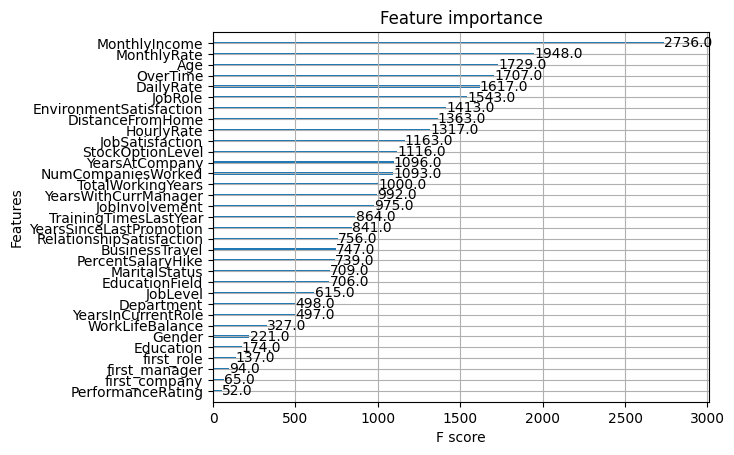

In [ ]:
clf = evaluate_study(study, d_train, d_val, d_test, y_test)

In [ ]:
best_trials_evaluator(study)

,precision,recall,f1_score,roc_auc,pr_auc,accuracy,rmse,logloss,params
0,0.92,0.31,0.46,0.65,0.39,0.88,0.34,1.88,"{'max_delta_step': 0, 'booster': 'dart', 'lamb..."


In [ ]:
optuna.visualization.plot_optimization_history(study)

In [ ]:
optuna.visualization.plot_slice(study)

In [ ]:
optuna.visualization.plot_param_importances(study)

# recall study

[0]	validate-auc:0.73653
[14]	validate-auc:0.74147
              precision    recall  f1-score   support

           0       0.88      0.99      0.93       185
           1       0.92      0.31      0.46        36

    accuracy                           0.88       221
   macro avg       0.90      0.65      0.70       221
weighted avg       0.89      0.88      0.86       221

[[184   1]
 [ 25  11]]


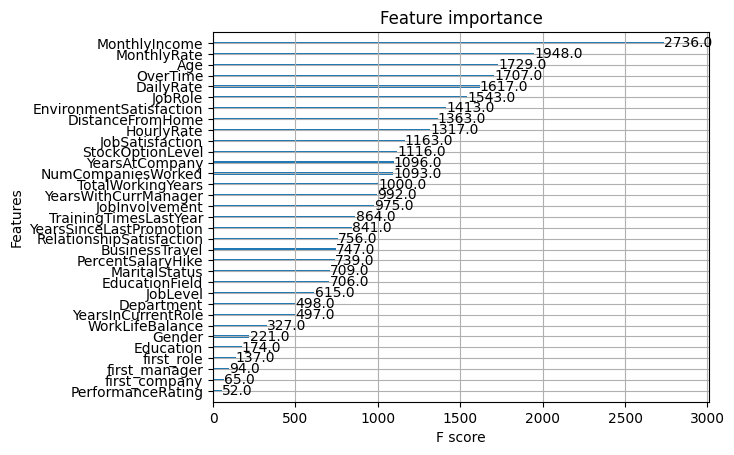

In [ ]:
clf = evaluate_study(recall_study, d_train, d_val, d_test, y_test)

In [ ]:
best_trials_evaluator(recall_study)

,precision,recall,f1_score,roc_auc,pr_auc,accuracy,rmse,logloss,params
0,0.89,0.22,0.36,0.61,0.32,0.87,0.36,2.09,"{'alpha': 1.2736466499568482, 'booster': 'dart..."
1,0.73,0.22,0.34,0.60,0.29,0.86,0.37,2.24,"{'alpha': 0.47105307973309013, 'booster': 'dar..."
2,0.68,0.36,0.47,0.66,0.35,0.87,0.36,2.09,"{'alpha': 2.125255707267785, 'booster': 'dart'..."
3,0.75,0.33,0.46,0.66,0.36,0.87,0.36,2.02,"{'alpha': 1.9474730739549773, 'booster': 'dart..."
4,0.50,0.06,0.10,0.52,0.18,0.84,0.40,2.60,"{'alpha': 1.4679380048405035, 'booster': 'dart..."
5,0.42,0.22,0.29,0.58,0.22,0.82,0.42,2.81,"{'alpha': 8.831185882239295, 'booster': 'dart'..."


In [ ]:
optuna.visualization.plot_optimization_history(recall_study)

In [ ]:
optuna.visualization.plot_slice(recall_study)

In [ ]:
optuna.visualization.plot_param_importances(recall_study)

# f1 study

[0]	validate-auc:0.73529
[26]	validate-auc:0.74764
              precision    recall  f1-score   support

           0       0.91      0.90      0.90       185
           1       0.51      0.56      0.53        36

    accuracy                           0.84       221
   macro avg       0.71      0.73      0.72       221
weighted avg       0.85      0.84      0.84       221

[[166  19]
 [ 16  20]]


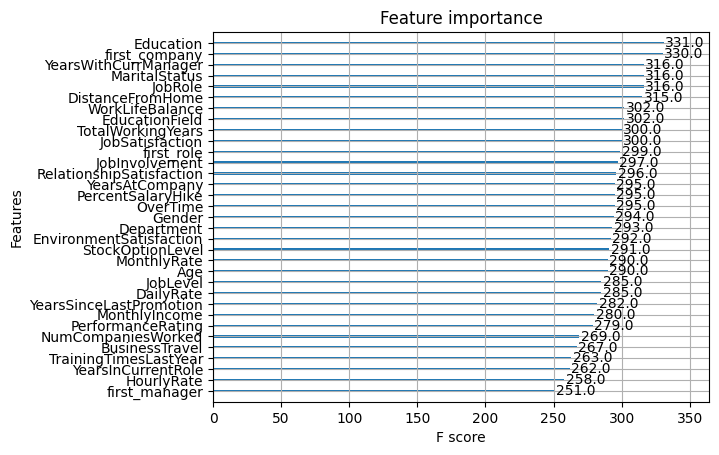

In [ ]:
clf = evaluate_study(f1_study, d_train, d_val, d_test, y_test)

In [ ]:
best_trials_evaluator(f1_study)

,precision,recall,f1_score,roc_auc,pr_auc,accuracy,rmse,logloss,params
0,0.51,0.56,0.53,0.73,0.36,0.84,0.4,2.52,"{'alpha': 1.696476377114387e-07, 'booster': 'g..."


In [ ]:
optuna.visualization.plot_optimization_history(f1_study)

In [ ]:
optuna.visualization.plot_slice(f1_study)

In [ ]:
optuna.visualization.plot_param_importances(f1_study)

# auc study

[0]	validate-auc:0.71012
[62]	validate-auc:0.74934
              precision    recall  f1-score   support

           0       0.94      0.80      0.86       185
           1       0.41      0.72      0.53        36

    accuracy                           0.79       221
   macro avg       0.67      0.76      0.69       221
weighted avg       0.85      0.79      0.81       221

[[148  37]
 [ 10  26]]


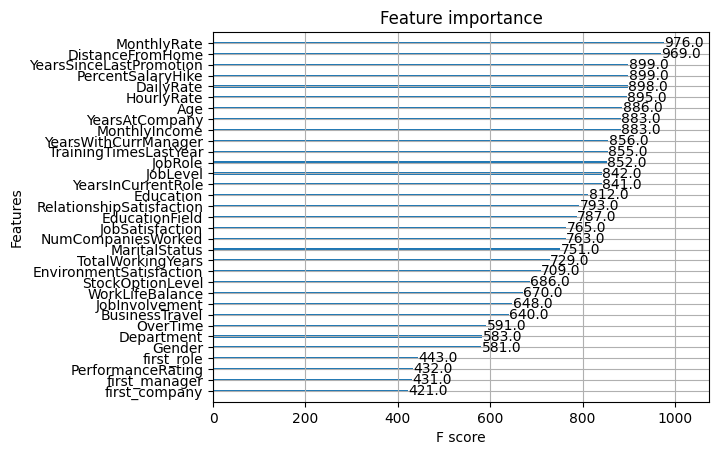

In [ ]:
clf = evaluate_study(auc_study, d_train, d_val, d_test, y_test)

In [ ]:
best_trials_evaluator(auc_study)

,precision,recall,f1_score,roc_auc,pr_auc,accuracy,rmse,logloss,params
0,0.41,0.72,0.53,0.76,0.34,0.79,0.46,3.39,"{'alpha': 6.999142464001718e-06, 'booster': 'g..."


In [ ]:
optuna.visualization.plot_optimization_history(auc_study)

In [ ]:
optuna.visualization.plot_slice(auc_study)

In [ ]:
optuna.visualization.plot_param_importances(auc_study)

# log loss study

In [ ]:
clf = evaluate_study(logloss_study, d_train, d_val, d_test, y_test)

In [ ]:
best_trials_evaluator(logloss_study)

In [ ]:
optuna.visualization.plot_optimization_history(logloss_study)

In [ ]:
optuna.visualization.plot_slice(logloss_study)

In [ ]:
optuna.visualization.plot_param_importances(logloss_study)